# EXPLORATORY DATA ANALYSIS OF H1-B VISA DATASET 2019 :
* IMPORTING LIBRARIES

In [2]:
import numpy as np 
import re
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly
import getpass 
import sys
from sklearn.model_selection import train_test_split


tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [3]:
df = pd.read_csv("../input/h1bfy2019csv/H-1B_Disclosure_Data_FY2019.csv", low_memory = False)
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,2016/4/8,2019/4/30,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,2017/7/14,2019/5/13,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,2017/8/23,2019/4/30,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,2017/12/22,2019/8/20,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,2018/1/10,2019/4/15,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1048547, 260)

In [5]:
df = df[:200000]
df.shape

(200000, 260)

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,PERIOD_OF_EMPLOYMENT_START_DATE,PERIOD_OF_EMPLOYMENT_END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,AGENT_ATTORNEY_ADDRESS1,AGENT_ATTORNEY_ADDRESS2,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,AGENT_ATTORNEY_POSTAL_CODE,AGENT_ATTORNEY_COUNTRY,AGENT_ATTORNEY_PROVINCE,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,STATE_OF_HIGHEST_COURT,NAME_OF_HIGHEST_STATE_COURT,WORKSITE_WORKERS_1,SECONDARY_ENTITY_1,SECONDARY_ENTITY_BUSINESS_NAME_1,WORKSITE_ADDRESS1_1,WORKSITE_ADDRESS2_1,WORKSITE_CITY_1,WORKSITE_COUNTY_1,WORKSITE_STATE_1,WORKSITE_POSTAL_CODE_1,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,PREVAILING_WAGE_1,PW_UNIT_OF_PAY_1,PW_TRACKING_NUMBER_1,PW_WAGE_LEVEL_1,PW_OES_YEAR_1,PW_OTHER_SOURCE_1,PW_NON-OES_YEAR_1,PW_SURVEY_PUBLISHER_1,PW_SURVEY_NAME_1,WORKSITE_WORKERS_2,SECONDARY_ENTITY_2,SECONDARY_ENTITY_BUSINESS_NAME_2,WORKSITE_ADDRESS1_2,WORKSITE_ADDRESS2_2,WORKSITE_CITY_2,WORKSITE_COUNTY_2,WORKSITE_STATE_2,WORKSITE_POSTAL_CODE_2,WAGE_RATE_OF_PAY_FROM_2,WAGE_RATE_OF_PAY_TO_2,WAGE_UNIT_OF_PAY_2,PREVAILING_WAGE_2,PW_UNIT_OF_PAY_2,PW_TRACKING_NUMBER_2,PW_WAGE_LEVEL_2,PW_OES_YEAR_2,PW_OTHER_SOURCE_2,PW_NON-OES_YEAR_2,PW_SURVEY_PUBLISHER_2,PW_SURVEY_NAME_2,WORKSITE_WORKERS_3,SECONDARY_ENTITY_3,SECONDARY_ENTITY_BUSINESS_NAME_3,WORKSITE_ADDRESS1_3,WORKSITE_ADDRESS2_3,WORKSITE_CITY_3,WORKSITE_COUNTY_3,WORKSITE_STATE_3,WORKSITE_POSTAL_CODE_3,WAGE_RATE_OF_PAY_FROM_3,WAGE_RATE_OF_PAY_TO_3,WAGE_UNIT_OF_PAY_3,PREVAILING_WAGE_3,PW_UNIT_OF_PAY_3,PW_TRACKING_NUMBER_3,PW_WAGE_LEVEL_3,PW_OES_YEAR_3,PW_OTHER_SOURCE_3,PW_NON-OES_YEAR_3,PW_SURVEY_PUBLISHER_3,PW_SURVEY_NAME_3,WORKSITE_WORKERS_4,SECONDARY_ENTITY_4,SECONDARY_ENTITY_BUSINESS_NAME_4,WORKSITE_ADDRESS1_4,WORKSITE_ADDRESS2_4,WORKSITE_CITY_4,WORKSITE_COUNTY_4,WORKSITE_STATE_4,WORKSITE_POSTAL_CODE_4,WAGE_RATE_OF_PAY_FROM_4,WAGE_RATE_OF_PAY_TO_4,WAGE_UNIT_OF_PAY_4,PREVAILING_WAGE_4,PW_UNIT_OF_PAY_4,PW_TRACKING_NUMBER_4,PW_WAGE_LEVEL_4,PW_OES_YEAR_4,PW_OTHER_SOURCE_4,PW_NON-OES_YEAR_4,PW_SURVEY_PUBLISHER_4,PW_SURVEY_NAME_4,WORKSITE_WORKERS_5,SECONDARY_ENTITY_5,SECONDARY_ENTITY_BUSINESS_NAME_5,WORKSITE_ADDRESS1_5,WORKSITE_ADDRESS2_5,WORKSITE_CITY_5,WORKSITE_COUNTY_5,WORKSITE_STATE_5,WORKSITE_POSTAL_CODE_5,WAGE_RATE_OF_PAY_FROM_5,WAGE_RATE_OF_PAY_TO_5,WAGE_UNIT_OF_PAY_5,PREVAILING_WAGE_5,PW_UNIT_OF_PAY_5,PW_TRACKING_NUMBER_5,PW_WAGE_LEVEL_5,PW_OES_YEAR_5,PW_OTHER_SOURCE_5,PW_NON-OES_YEAR_5,PW_SURVEY_PUBLISHER_5,PW_SURVEY_NAME_5,WORKSITE_WORKERS_6,SECONDARY_ENTITY_6,SECONDARY_ENTITY_BUSINESS_NAME_6,WORKSITE_ADDRESS1_6,WORKSITE_ADDRESS2_6,WORKSITE_CITY_6,WORKSITE_COUNTY_6,WORKSITE_STATE_6,WORKSITE_POSTAL_CODE_6,WAGE_RATE_OF_PAY_FROM_6,WAGE_RATE_OF_PAY_TO_6,WAGE_UNIT_OF_PAY_6,PREVAILING_WAGE_6,PW_UNIT_OF_PAY_6,PW_TRACKING_NUMBER_6,PW_WAGE_LEVEL_6,PW_OES_YEAR_6,PW_OTHER_SOURCE_6,PW_NON-OES_YEAR_6,PW_SURVEY_PUBLISHER_6,PW_SURVEY_NAME_6,WORKSITE_WORKERS_7,SECONDARY_ENTITY_7,SECONDARY_ENTITY_BUSINESS_NAME_7,WORKSITE_ADDRESS1_7,WORKSITE_ADDRESS2_7,WORKSITE_CITY_7,WORKSITE_COUNTY_7,WORKSITE_STATE_7,WORKSITE_POSTAL_CODE_7,WAGE_RATE_OF_PAY_FROM_7,WAGE_RATE_OF_PAY_TO_7,WAGE_UNIT_OF_PAY_7,PREVAILING_WAGE_7,PW_UNIT_OF_PAY_7,PW_TRACKING_NUMBER_7,PW_WAGE_LEVEL_7,PW_OES_YEAR_7,PW_OTHER_SOURCE_7,PW_NON-OES_YEAR_7,PW_SURVEY_PUBLISHER_7,PW_SURVEY_NAME_7,WORKSITE_WORKERS_8,SECONDARY_ENTITY_8,SECONDARY_ENTITY_BUSINESS_NAME_8,WORKSITE_ADDRESS1_8,WORKSITE_ADDRESS2_8,WORKSITE_CITY_8,WORKSITE_COUNTY_8,WORKSITE_STATE_8,WORKSITE_POSTAL_CODE_8,WAGE_RATE_OF_PAY_FROM_8,WAGE_RATE_OF_PAY_TO_8,WAGE_UNIT_OF_PAY_8,PREVAI

In [31]:
df = df[df.VISA_CLASS == 'H-1B']

In [8]:
df.EMPLOYER_COUNTRY.value_counts()

UNITED STATES OF AMERICA    177352
CANADA                           7
INDIA                            3
TURKEY                           1
Name: EMPLOYER_COUNTRY, dtype: int64

In [9]:
df= df[df.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']

In [10]:
df.apply(lambda x:len(x.unique()))

CASE_NUMBER           177352
CASE_STATUS                4
CASE_SUBMITTED        113810
DECISION_DATE           4065
ORIGINAL_CERT_DATE       926
                       ...  
WILLFUL_VIOLATOR           3
SUPPORT_H1B                3
STATUTORY_BASIS            4
MASTERS_EXEMPTION          2
PUBLIC_DISCLOSURE          4
Length: 260, dtype: int64

In [11]:
df.isnull().sum()[df.isnull().sum() > 0]

ORIGINAL_CERT_DATE        173328
TOTAL_WORKER_POSITIONS         1
EMPLOYER_NAME                  3
EMPLOYER_BUSINESS_DBA     167061
EMPLOYER_ADDRESS2          97753
                           ...  
WILLFUL_VIOLATOR               4
SUPPORT_H1B                96966
STATUTORY_BASIS           107690
MASTERS_EXEMPTION         177061
PUBLIC_DISCLOSURE           3156
Length: 239, dtype: int64

#  SELECTING RELEVANT FEATURES 

In [33]:
to_select = ['CASE_NUMBER', 'CASE_STATUS', 'EMPLOYER_NAME', 'SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER',
             'PERIOD_OF_EMPLOYMENT_START_DATE', 'JOB_TITLE', 'SOC_TITLE', 'SOC_CODE', 'NAICS_CODE', 'FULL_TIME_POSITION',
             'NEW_CONCURRENT_EMPLOYMENT', 'PREVAILING_WAGE_1', 'CONTINUED_EMPLOYMENT','CHANGE_PREVIOUS_EMPLOYMENT', 
             'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B', 'WILLFUL_VIOLATOR',
             'WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1']

In [34]:
df1 = df[to_select]
df1.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,PERIOD_OF_EMPLOYMENT_START_DATE,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,FULL_TIME_POSITION,NEW_CONCURRENT_EMPLOYMENT,PREVAILING_WAGE_1,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1
6,I-200-18289-307616,WITHDRAWN,MH SUB I LLC,NaN,Y,03/07/2019,DIRECTOR OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,454111.0,Y,0.0,97365.0,0,1.0,0.0,0.0,N,NaN,N,100000,Year
7,I-200-19015-877040,WITHDRAWN,"KIIP, INC.",N,Y,2019/5/27,HEAD OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541990.0,Y,0.0,131685.0,1,0.0,0.0,0.0,N,NaN,N,131685,Year
8,I-200-19031-693896,WITHDRAWN,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",N,Y,2019/2/23,"ACCOUNT DIRECTOR, SOCIAL MEDIA",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541820.0,Y,0.0,97365.0,1,0.0,0.0,0.0,N,NaN,N,99750,Year
9,I-200-19056-659352,WITHDRAWN,"SOLAREDGE TECHNOLOGIES, INC.",N,Y,2019/9/1,PRODUCT MARKETING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334413.0,Y,0.0,126901.0,0,0.0,0.0,0.0,N,NaN,N,130000,Year
10,I-200-19066-002723,WITHDRAWN,SOULSIGHT,N,Y,2019/9/6,ASSOCIATE ACCOUNT STRATEGY MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541430.0,Y,0.0,47549.0,0,0.0,0.0,0.0,N,NaN,N,50000,Year


In [35]:
df1.dtypes

CASE_NUMBER                         object
CASE_STATUS                         object
EMPLOYER_NAME                       object
SECONDARY_ENTITY_1                  object
AGENT_REPRESENTING_EMPLOYER         object
PERIOD_OF_EMPLOYMENT_START_DATE     object
JOB_TITLE                           object
SOC_TITLE                           object
SOC_CODE                            object
NAICS_CODE                         float64
FULL_TIME_POSITION                  object
NEW_CONCURRENT_EMPLOYMENT          float64
PREVAILING_WAGE_1                  float64
CONTINUED_EMPLOYMENT                object
CHANGE_PREVIOUS_EMPLOYMENT         float64
CHANGE_EMPLOYER                    float64
AMENDED_PETITION                   float64
H-1B_DEPENDENT                      object
SUPPORT_H1B                         object
WILLFUL_VIOLATOR                    object
WAGE_RATE_OF_PAY_FROM_1             object
WAGE_UNIT_OF_PAY_1                  object
dtype: object

# DISTRIBUTION OF VISA CASES WITH THE COMPANIES -

<AxesSubplot:>

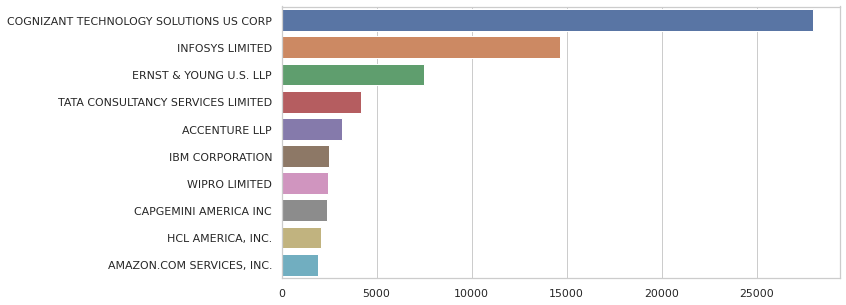

In [36]:
emp = df1['EMPLOYER_NAME'].value_counts()[:10]
sns.barplot(x= emp.values, y = emp.index)

<AxesSubplot:xlabel='EMPLOYER_NAME'>

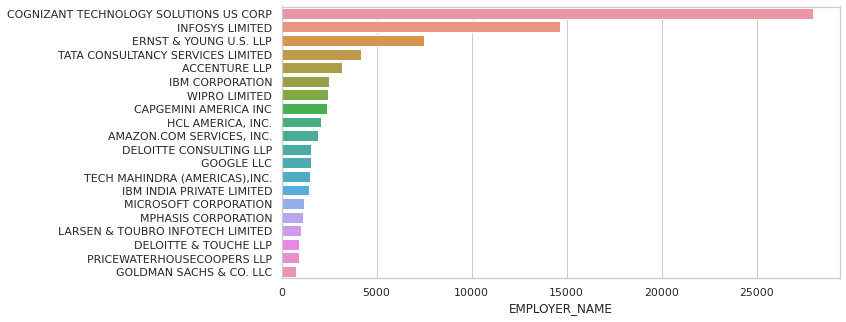

In [41]:
df1['EMPLOYER_NAME'].value_counts()
sns.barplot(x = df1['EMPLOYER_NAME'].value_counts()[:20], y = df1['EMPLOYER_NAME'].value_counts().index[:20])

# PIE chart showing different cases of CASE-STATUS 

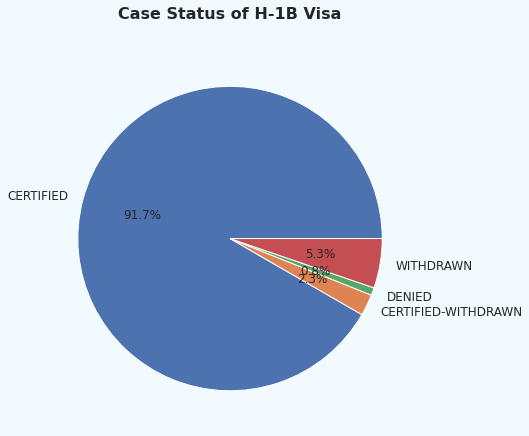

In [37]:
fig = plt.figure(figsize=(7,7))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

sums = df1.CASE_NUMBER.groupby(df.CASE_STATUS).count()
pie(sums, labels = sums.index, autopct='%.1f%%', textprops={'fontsize': 12})

ax1 = plt.title('Case Status of H-1B Visa',
          fontsize = 16,
          fontweight = 'heavy',
          loc = 'center', 
          pad = 30); #semi-colon for hide text before graph output

<AxesSubplot:title={'center':'H1B Petitions by Case Status'}>

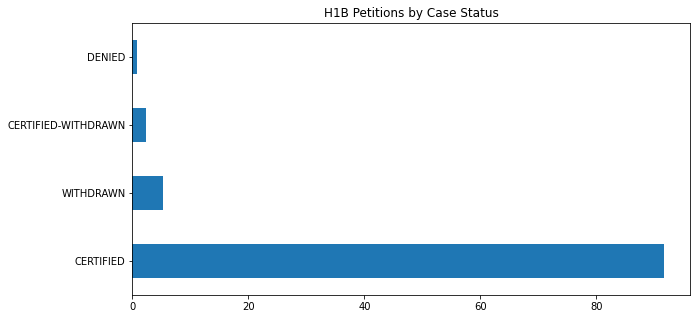

In [16]:
plt.rcParams["figure.figsize"] = (10,5)
(df1.CASE_STATUS.value_counts(normalize=True)*100).plot(kind='barh',title='H1B Petitions by Case Status')

<AxesSubplot:title={'center':'Occupation of the top h1b companies'}, ylabel='SOC_TITLE'>

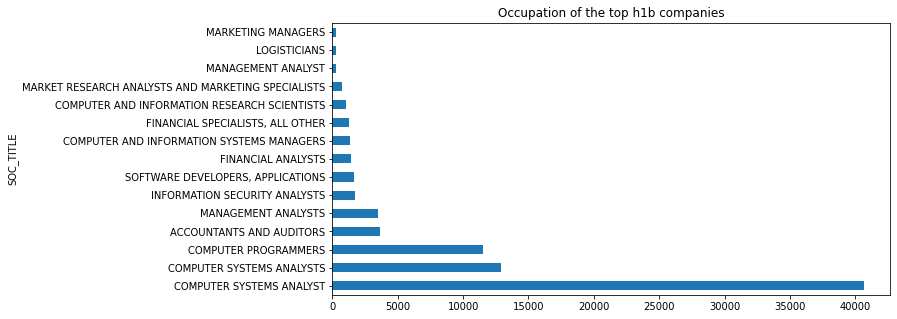

In [17]:
top = df1.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(25).index.tolist()
top_df = df1.loc[df1.EMPLOYER_NAME.isin(top)]
top_df.groupby('SOC_TITLE').EMPLOYER_NAME.count().nlargest(15).plot(kind='barh',title='Occupation of the top h1b companies')

# Which employers file the most petitions 

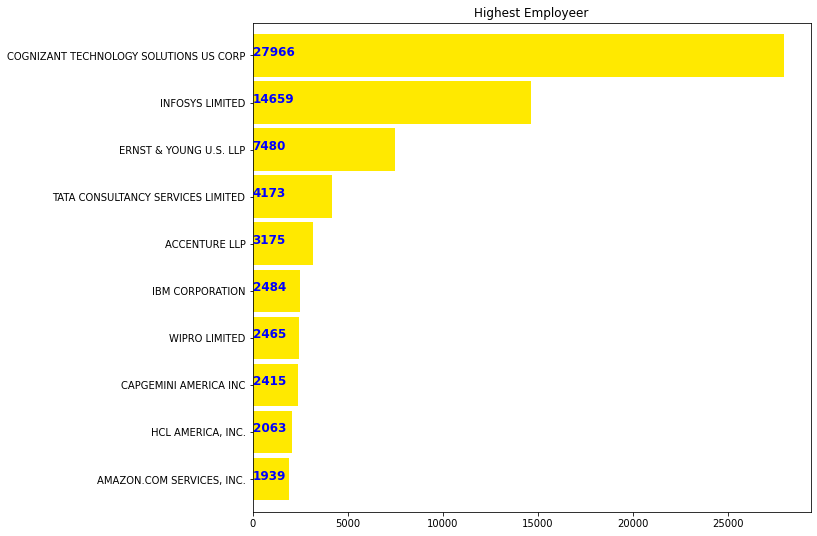

In [19]:
plt.figure(figsize=(10,9))
ax = df1['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:10].plot.barh(width=0.9,color='#ffe900')
for i, v in enumerate(df['EMPLOYER_NAME'].value_counts().sort_values(ascending=False).values[:10]): 
    ax.text(.8, i, v,fontsize=12,color='blue',weight='bold')
plt.title('Highest Employeer')
fig=plt.gca()
fig.invert_yaxis()
plt.show()

# WAGE DISTRIBUTION

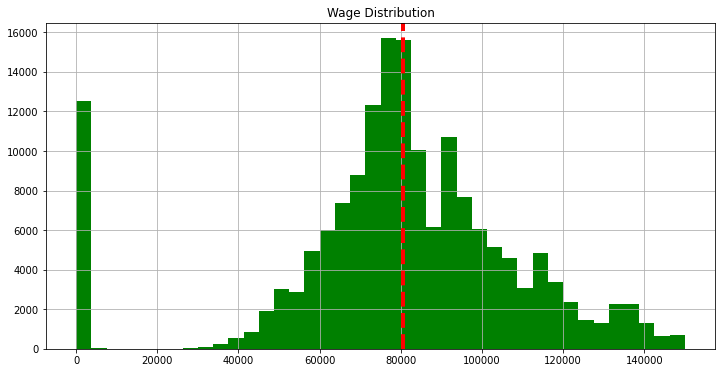

In [20]:
plt.figure(figsize=(12,6))
df[df['PREVAILING_WAGE_1']<150000].PREVAILING_WAGE_1.hist(bins=40,color='green')
plt.axvline(df[df['PREVAILING_WAGE_1']<=150000].PREVAILING_WAGE_1.median(), color='red', linestyle='dashed', linewidth=4)
plt.title('Wage Distribution')
plt.show()

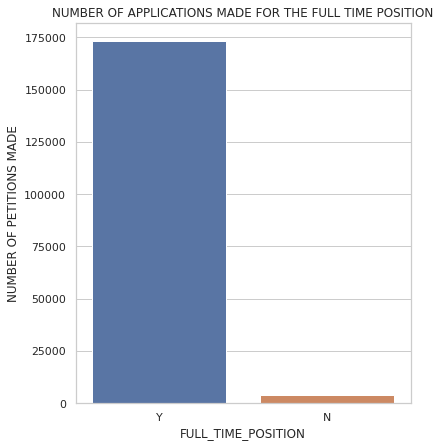

In [27]:
plt.figure(figsize=(6,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df1)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

<AxesSubplot:>

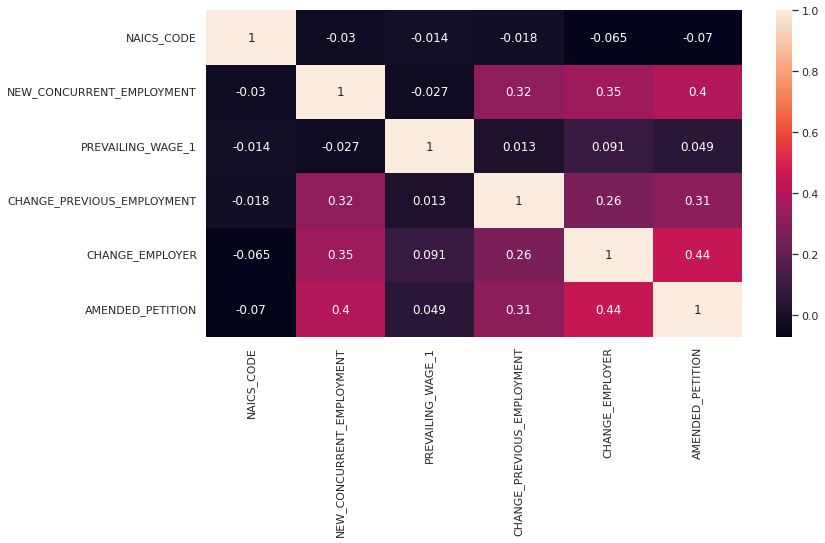

In [47]:
cor = df1.corr()

plt.figure(figsize=(12,6))
sns.heatmap(cor, annot = True)

In [23]:
df1.isnull().sum()

CASE_NUMBER                           0
CASE_STATUS                           0
PERIOD_OF_EMPLOYMENT_START_DATE       0
EMPLOYER_NAME                         3
EMPLOYER_STATE                        0
JOB_TITLE                             0
SOC_TITLE                             0
FULL_TIME_POSITION                    0
PREVAILING_WAGE_1                  3154
PW_UNIT_OF_PAY_1                   3154
WORKSITE_STATE_1                      2
dtype: int64

In [45]:
df1.EMPLOYER_NAME.value_counts()
print('EMPLOYER_NAME:\n',df1.EMPLOYER_NAME.value_counts()[300:350])

EMPLOYER_NAME:
 VSLN INTERNATIONAL, INC                          36
GROUPON, INC.                                    35
MORGAN STANLEY & CO. LLC                         35
NCR CORPORATION                                  35
CAPITAL ONE SERVICES, LLC                        35
CREDIT KARMA, INC.                               35
ATOS SYNTEL INC                                  35
REVEREIT LLC                                     35
AQR CAPITAL MANAGEMENT, LLC                      35
ALPHA NET CONSULTING LLC                         35
APPIAN CORPORATION                               35
TARGET ENTERPRISE, INC.                          34
NOVARTIS PHARMACEUTICALS CORPORATION             34
FIFTH THIRD BANK, AN OHIO BANKING CORPORATION    34
ALTIMETRIK CORP                                  34
INFO WAY SOLUTIONS LLC                           34
WHIRLPOOL CORPORATION                            34
RJT COMPUQUEST, INC.                             34
QUALITY MATRIX INC                              

In [48]:
df1['CASE_STATUS'] = df1['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2, 'WITHDRAWN' : 3})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
df1.AGENT_REPRESENTING_EMPLOYER.value_counts(dropna = False)

Y      104937
N       72412
NaN         3
Name: AGENT_REPRESENTING_EMPLOYER, dtype: int64

In [50]:
df1.WILLFUL_VIOLATOR.value_counts(dropna = False)

N      177269
Y          79
NaN         4
Name: WILLFUL_VIOLATOR, dtype: int64

In [51]:
df1['FULL_TIME_POSITION'] = df1['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df1['AGENT_REPRESENTING_EMPLOYER'] = df1['AGENT_REPRESENTING_EMPLOYER'].map({'N' : 0, 'Y' : 1})
df1['SECONDARY_ENTITY_1'] = df1['SECONDARY_ENTITY_1'].map({'N' : 0, 'Y' : 1})
df1['H-1B_DEPENDENT'] = df1['H-1B_DEPENDENT'].map({'N' : 0, 'Y' : 1})
df1['WILLFUL_VIOLATOR'] = df1['WILLFUL_VIOLATOR'].map({'N' : 0, 'Y' : 1})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [52]:
df1['AGENT_REPRESENTING_EMPLOYER'] = df1['AGENT_REPRESENTING_EMPLOYER'].fillna(df1['AGENT_REPRESENTING_EMPLOYER'].mode()[0])
df1['SECONDARY_ENTITY_1'] = df1['SECONDARY_ENTITY_1'].fillna(df1['SECONDARY_ENTITY_1'].mode()[0])
df1['H-1B_DEPENDENT'] = df1['H-1B_DEPENDENT'].fillna(df1['H-1B_DEPENDENT'].mode()[0])
df1['WILLFUL_VIOLATOR'] = df1['WILLFUL_VIOLATOR'].fillna(df1['WILLFUL_VIOLATOR'].mode()[0])
df1['EMPLOYER_NAME'] = df1['EMPLOYER_NAME'].fillna(df1['EMPLOYER_NAME'].mode()[0])
df1['JOB_TITLE'] = df1['JOB_TITLE'].fillna(df1['JOB_TITLE'].mode()[0])
df1['SOC_CODE'] = df1['SOC_CODE'].fillna(df1['SOC_CODE'].mode()[0])
df1['NAICS_CODE'] = df1['NAICS_CODE'].fillna(df1['NAICS_CODE'].mode()[0])
df1['SOC_CODE'] = df1['SOC_CODE'].fillna(df1['SOC_CODE'].mode()[0])
df1['NEW_CONCURRENT_EMPLOYMENT'] = df1['NEW_CONCURRENT_EMPLOYMENT'].fillna(df1['NEW_CONCURRENT_EMPLOYMENT'].mode()[0])
df1['WAGE_UNIT_OF_PAY_1'] = df1['WAGE_UNIT_OF_PAY_1'].fillna(df1['WAGE_UNIT_OF_PAY_1'].mode()[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [53]:
df1.isnull().sum()

CASE_NUMBER                            0
CASE_STATUS                            0
EMPLOYER_NAME                          0
SECONDARY_ENTITY_1                     0
AGENT_REPRESENTING_EMPLOYER            0
PERIOD_OF_EMPLOYMENT_START_DATE        0
JOB_TITLE                              0
SOC_TITLE                              0
SOC_CODE                               0
NAICS_CODE                             0
FULL_TIME_POSITION                     0
NEW_CONCURRENT_EMPLOYMENT              0
PREVAILING_WAGE_1                   3154
CONTINUED_EMPLOYMENT                   0
CHANGE_PREVIOUS_EMPLOYMENT             0
CHANGE_EMPLOYER                        0
AMENDED_PETITION                       0
H-1B_DEPENDENT                         0
SUPPORT_H1B                        96966
WILLFUL_VIOLATOR                       0
WAGE_RATE_OF_PAY_FROM_1                2
WAGE_UNIT_OF_PAY_1                     0
dtype: int64

In [54]:
df1['H-1B_DEPENDENT'].value_counts()

0.0    97068
1.0    80284
Name: H-1B_DEPENDENT, dtype: int64

In [55]:
df1['NEW_CONCURRENT_EMP'] = df1['NEW_CONCURRENT_EMPLOYMENT']
df1['NEW_CONCURRENT_EMP'] = np.where(df1['NEW_CONCURRENT_EMP'].isin([0]), '0',
                             np.where(df1['NEW_CONCURRENT_EMP'].isin([1]), '1', '>1'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df1['CHANGE_PREVIOUS_EMP'] = df1['CHANGE_PREVIOUS_EMPLOYMENT']
df1['CHANGE_PREVIOUS_EMP'] = np.where(df1['CHANGE_PREVIOUS_EMPLOYMENT'].isin([0]), '0',
                             np.where(df1['CHANGE_PREVIOUS_EMPLOYMENT'].isin([1]), '1', '>1'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
df1['CONTINUED_EMPLOYMENT_BIN'] = df1['CONTINUED_EMPLOYMENT']
df1['CONTINUED_EMPLOYMENT_BIN'] = np.where(df1['CONTINUED_EMPLOYMENT'].isin([0]), '0',
                             np.where(df1['CONTINUED_EMPLOYMENT'].isin([1]), '1', '>1'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
df1['AMENDED_PETITION_BIN'] = df1['AMENDED_PETITION']
df1['AMENDED_PETITION_BIN'] = np.where(df1['AMENDED_PETITION'].isin([0]), '0',
                             np.where(df1['AMENDED_PETITION'].isin([1]), '1', '>1'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
df1['CHANGE_EMPLOYER_BIN'] = df1['CHANGE_EMPLOYER']
df1['CHANGE_EMPLOYER_BIN'] = np.where(df1['CHANGE_EMPLOYER'].isin([0]), '0',
                             np.where(df1['CHANGE_EMPLOYER'].isin([1]), '1', '>1'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
df1.AMENDED_PETITION_BIN.value_counts()

0     150974
1      23969
>1      2409
Name: AMENDED_PETITION_BIN, dtype: int64

In [61]:
df1['PREVAILING_WAGE_1'].value_counts(dropna = False)

NaN         3154
93642.00    2660
80850.00    2582
73944.00    1806
75837.00    1702
            ... 
33751.00       1
28.97          1
31.42          1
55640.00       1
76532.00       1
Name: PREVAILING_WAGE_1, Length: 10660, dtype: int64

In [64]:
q1 = df1["PREVAILING_WAGE_1"].quantile(0.25)
q3 = df1["PREVAILING_WAGE_1"].quantile(0.75)
IQR = q3 - q1
mean = df1['PREVAILING_WAGE_1'].mean()

<Figure size 1440x1440 with 0 Axes>

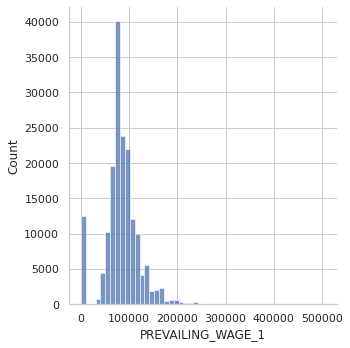

In [65]:
plt.figure(figsize=(20,20))
sns.displot(df1['PREVAILING_WAGE_1'], bins = 50)

<AxesSubplot:>

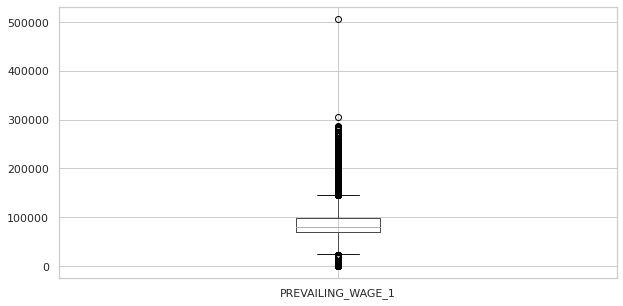

In [66]:
df1.boxplot(column='PREVAILING_WAGE_1')

In [67]:
df1.isnull().sum()

CASE_NUMBER                            0
CASE_STATUS                            0
EMPLOYER_NAME                          0
SECONDARY_ENTITY_1                     0
AGENT_REPRESENTING_EMPLOYER            0
PERIOD_OF_EMPLOYMENT_START_DATE        0
JOB_TITLE                              0
SOC_TITLE                              0
SOC_CODE                               0
NAICS_CODE                             0
FULL_TIME_POSITION                     0
NEW_CONCURRENT_EMPLOYMENT              0
PREVAILING_WAGE_1                   3154
CONTINUED_EMPLOYMENT                   0
CHANGE_PREVIOUS_EMPLOYMENT             0
CHANGE_EMPLOYER                        0
AMENDED_PETITION                       0
H-1B_DEPENDENT                         0
SUPPORT_H1B                        96966
WILLFUL_VIOLATOR                       0
WAGE_RATE_OF_PAY_FROM_1                2
WAGE_UNIT_OF_PAY_1                     0
NEW_CONCURRENT_EMP                     0
CHANGE_PREVIOUS_EMP                    0
CONTINUED_EMPLOY

In [68]:
df1.SOC_TITLE.value_counts()

COMPUTER SYSTEMS ANALYST                              40796
COMPUTER SYSTEMS ANALYSTS                             29809
COMPUTER PROGRAMMERS                                  15640
SOFTWARE DEVELOPERS, APPLICATIONS                     13037
ACCOUNTANTS AND AUDITORS                              10309
                                                      ...  
MARKETING RESEARCH ANALYSTS AND MARKETING SPECIALI        1
MARKET RESEARCH ANALYSTS AND MARKETING SCPECIALIST        1
ADMINISTRATIVE SERVICES MANAGER                           1
ACCOUNTANTS AND AUDOTORS                                  1
SENIOR SOFTWARE DEVELOPER                                 1
Name: SOC_TITLE, Length: 171, dtype: int64

In [69]:
df1['OCCUPATION'] = np.nan
df1['SOC_TITLE'] = df1['SOC_TITLE'].str.lower()
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('computer','programmer', na=False)] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('software','web developer', na=False)] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('database', na=False)] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('math','statistic', na=False)] = 'Mathematical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('predictive model','stats', na=False)] = 'Mathematical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('teacher','linguist', na=False)] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('professor','Teach', na=False)] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('school principal', na=False)] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('medical','doctor', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('physician','dentist', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('Health','Physical Therapists', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('surgeon','nurse', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('psychiatry', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('chemist','physicist', na=False)] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('biology','scientist', na=False)] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('biologi','clinical research', na=False)] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('public relation','manage', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('management','operation', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('chief','plan', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('executive', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('advertis','marketing', na=False)] = 'Marketing Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('promotion','market research', na=False)] = 'Marketing Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('business','business analyst', na=False)] = 'Business Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('business systems analyst', na=False)] = 'Business Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('accountant','finance', na=False)] = 'Financial Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('financial', na=False)] = 'Financial Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('engineer','architect', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('surveyor','carto', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('technician','drafter', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('information security','information tech', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('education','law', na=False)] = 'Administrative Occupation'

df1['OCCUPATION']= df1.OCCUPATION.replace(np.nan, 'Others', regex=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [70]:
df1.OCCUPATION.value_counts(dropna = False)

Computer Occupations          114016
Financial Occupation           24393
Others                         20858
Management Occupation          10162
Architecture & Engineering      6300
Medical Occupations              535
Business Occupation              519
Administrative Occupation        371
Marketing Occupation             198
Name: OCCUPATION, dtype: int64

In [74]:
df1.SOC_TITLE.value_counts()[:70]
print('SOC_TITLE:\n',df1.SOC_TITLE.value_counts()[:50])

SOC_TITLE:
 computer systems analyst                                          40796
computer systems analysts                                         29809
computer programmers                                              15640
software developers, applications                                 13037
accountants and auditors                                          10309
management analysts                                                9408
computer and information systems managers                          8749
financial analysts                                                 8662
market research analysts and marketing specialists                 5546
information security analysts                                      4648
computer and information research scientists                       4175
financial specialists, all other                                   3712
marketing managers                                                 2184
logisticians                                        

In [75]:
df1.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,PERIOD_OF_EMPLOYMENT_START_DATE,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,FULL_TIME_POSITION,NEW_CONCURRENT_EMPLOYMENT,PREVAILING_WAGE_1,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,NEW_CONCURRENT_EMP,CHANGE_PREVIOUS_EMP,CONTINUED_EMPLOYMENT_BIN,AMENDED_PETITION_BIN,CHANGE_EMPLOYER_BIN,OCCUPATION
6,I-200-18289-307616,3,MH SUB I LLC,0.0,1.0,03/07/2019,DIRECTOR OF BUSINESS DEVELOPMENT,advertising and promotions managers,11-2011,454111.0,1,0.0,97365.0,0,1.0,0.0,0.0,0.0,NaN,0.0,100000,Year,0,1,>1,0,0,Marketing Occupation
7,I-200-19015-877040,3,"KIIP, INC.",0.0,1.0,2019/5/27,HEAD OF BUSINESS DEVELOPMENT,advertising and promotions managers,11-2011,541990.0,1,0.0,131685.0,1,0.0,0.0,0.0,0.0,NaN,0.0,131685,Year,0,0,>1,0,0,Marketing Occupation
8,I-200-19031-693896,3,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",0.0,1.0,2019/2/23,"ACCOUNT DIRECTOR, SOCIAL MEDIA",advertising and promotions managers,11-2011,541820.0,1,0.0,97365.0,1,0.0,0.0,0.0,0.0,NaN,0.0,99750,Year,0,0,>1,0,0,Marketing Occupation
9,I-200-19056-659352,3,"SOLAREDGE TECHNOLOGIES, INC.",0.0,1.0,2019/9/1,PRODUCT MARKETING MANAGER,advertising and promotions managers,11-2011,334413.0,1,0.0,126901.0,0,0.0,0.0,0.0,0.0,NaN,0.0,130000,Year,0,0,>1,0,0,Marketing Occupation
10,I-200-19066-002723,3,SOULSIGHT,0.0,1.0,2019/9/6,ASSOCIATE ACCOUNT STRATEGY MANAGER,advertising and promotions managers,11-2011,541430.0,1,0.0,47549.0,0,0.0,0.0,0.0,0.0,NaN,0.0,50000,Year,0,0,>1,0,0,Marketing Occupation


In [76]:
df1.EMPLOYER_NAME.value_counts(dropna = False)

COGNIZANT TECHNOLOGY SOLUTIONS US CORP    27969
INFOSYS LIMITED                           14659
ERNST & YOUNG U.S. LLP                     7480
TATA CONSULTANCY SERVICES LIMITED          4173
ACCENTURE LLP                              3175
                                          ...  
HYPERSPACE VENTURES                           1
TIGER LIFESCIENCE INC.                        1
OMNIS HEALTH LLC                              1
RACAMI, LLC                                   1
COLUMN5 CONSULTING, LLC                       1
Name: EMPLOYER_NAME, Length: 26813, dtype: int64

In [77]:
df1['NEW_EMPLOYER'] = np.nan
df1.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(177352, 29)

In [78]:
df1['EMPLOYER_NAME'] = df1['EMPLOYER_NAME'].str.lower()
df1.NEW_EMPLOYER[df1['EMPLOYER_NAME'].str.contains('university', na = False)] = 'university'
df1['NEW_EMPLOYER']= df1.NEW_EMPLOYER.replace(np.nan, 'non university', regex=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel

In [79]:
df1.NEW_EMPLOYER.value_counts(dropna = False)

non university    175770
university          1582
Name: NEW_EMPLOYER, dtype: int64

In [80]:
df1['NEW_EMPLOYER'] = df1['NEW_EMPLOYER'].map({'university' : 1, 'non university' : 0})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
df1.isnull().sum()

CASE_NUMBER                            0
CASE_STATUS                            0
EMPLOYER_NAME                          0
SECONDARY_ENTITY_1                     0
AGENT_REPRESENTING_EMPLOYER            0
PERIOD_OF_EMPLOYMENT_START_DATE        0
JOB_TITLE                              0
SOC_TITLE                              0
SOC_CODE                               0
NAICS_CODE                             0
FULL_TIME_POSITION                     0
NEW_CONCURRENT_EMPLOYMENT              0
PREVAILING_WAGE_1                   3154
CONTINUED_EMPLOYMENT                   0
CHANGE_PREVIOUS_EMPLOYMENT             0
CHANGE_EMPLOYER                        0
AMENDED_PETITION                       0
H-1B_DEPENDENT                         0
SUPPORT_H1B                        96966
WILLFUL_VIOLATOR                       0
WAGE_RATE_OF_PAY_FROM_1                2
WAGE_UNIT_OF_PAY_1                     0
NEW_CONCURRENT_EMP                     0
CHANGE_PREVIOUS_EMP                    0
CONTINUED_EMPLOY

In [82]:
df1.PERIOD_OF_EMPLOYMENT_START_DATE.value_counts()

2019/8/1      6477
2019/9/1      4252
2019/5/1      3700
2019/6/1      2666
2019/8/15     2428
              ... 
2018/10/13       1
09/01/2018       1
2018/11/24       1
2018/11/6        1
09/28/2018       1
Name: PERIOD_OF_EMPLOYMENT_START_DATE, Length: 782, dtype: int64

In [83]:
df1['YEAR'] = pd.DatetimeIndex(df1['PERIOD_OF_EMPLOYMENT_START_DATE']).year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
df1.isnull().sum()

CASE_NUMBER                            0
CASE_STATUS                            0
EMPLOYER_NAME                          0
SECONDARY_ENTITY_1                     0
AGENT_REPRESENTING_EMPLOYER            0
PERIOD_OF_EMPLOYMENT_START_DATE        0
JOB_TITLE                              0
SOC_TITLE                              0
SOC_CODE                               0
NAICS_CODE                             0
FULL_TIME_POSITION                     0
NEW_CONCURRENT_EMPLOYMENT              0
PREVAILING_WAGE_1                   3154
CONTINUED_EMPLOYMENT                   0
CHANGE_PREVIOUS_EMPLOYMENT             0
CHANGE_EMPLOYER                        0
AMENDED_PETITION                       0
H-1B_DEPENDENT                         0
SUPPORT_H1B                        96966
WILLFUL_VIOLATOR                       0
WAGE_RATE_OF_PAY_FROM_1                2
WAGE_UNIT_OF_PAY_1                     0
NEW_CONCURRENT_EMP                     0
CHANGE_PREVIOUS_EMP                    0
CONTINUED_EMPLOY

In [85]:
df1.shape

(177352, 30)

In [92]:
df1.head()

,CASE_STATUS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,FULL_TIME_POSITION,PREVAILING_WAGE_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WAGE_UNIT_OF_PAY_1,NEW_CONCURRENT_EMP,CHANGE_PREVIOUS_EMP,CONTINUED_EMPLOYMENT_BIN,AMENDED_PETITION_BIN,CHANGE_EMPLOYER_BIN,OCCUPATION,NEW_EMPLOYER,YEAR
6,3,0.0,1.0,1,97365.0,0.0,0.0,Year,0,1,>1,0,0,Marketing Occupation,0,2019
7,3,0.0,1.0,1,131685.0,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019
8,3,0.0,1.0,1,97365.0,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019
9,3,0.0,1.0,1,126901.0,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019
10,3,0.0,1.0,1,47549.0,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019


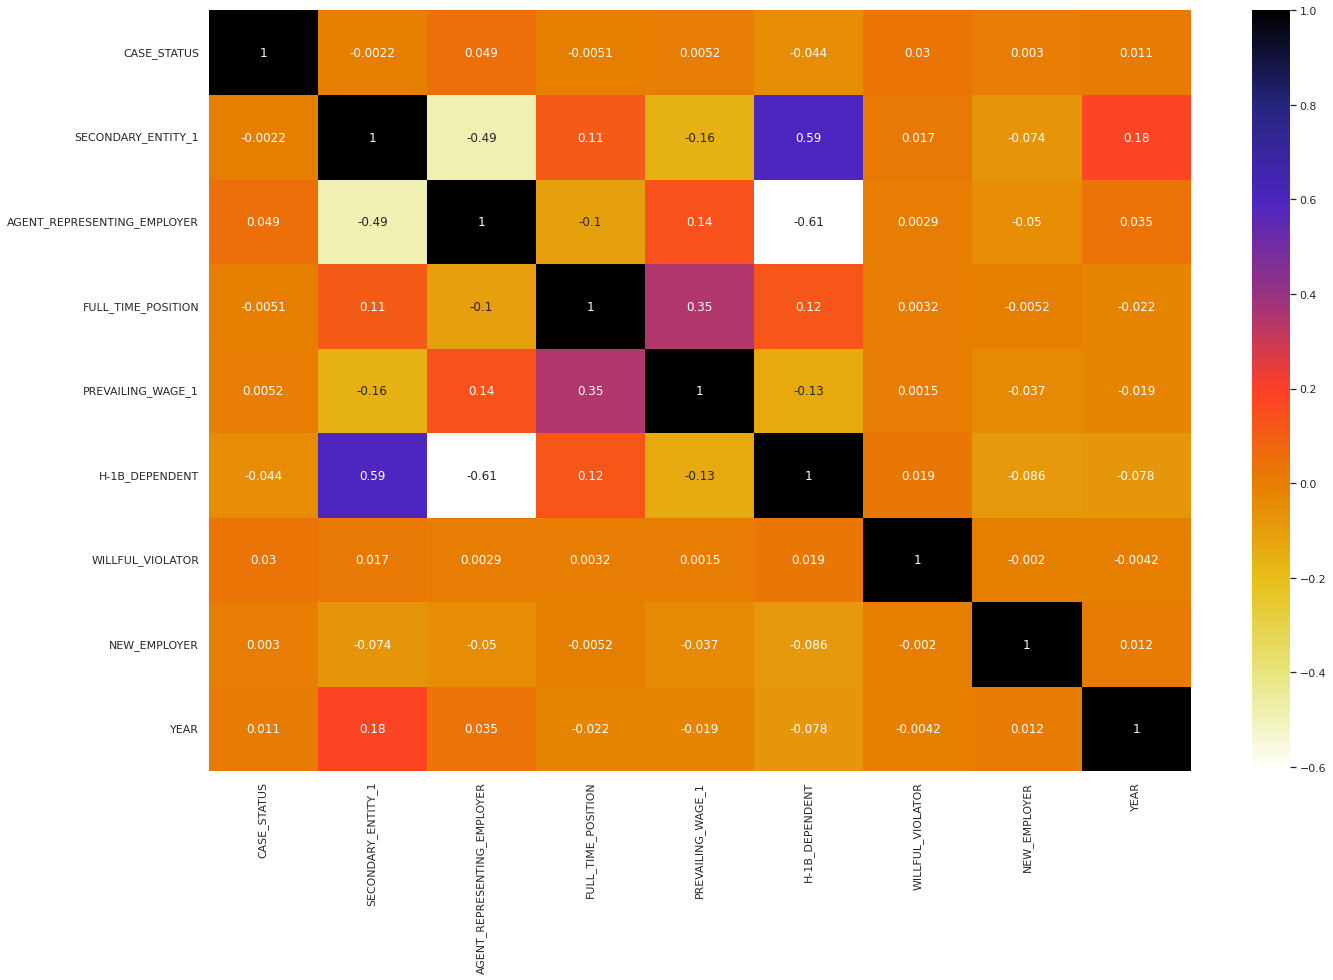

In [94]:
import seaborn as sns
plt.figure(figsize=(22, 14))
cor = df1.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [95]:
df1.dtypes

CASE_STATUS                      int64
SECONDARY_ENTITY_1             float64
AGENT_REPRESENTING_EMPLOYER    float64
FULL_TIME_POSITION               int64
PREVAILING_WAGE_1              float64
H-1B_DEPENDENT                 float64
WILLFUL_VIOLATOR               float64
WAGE_UNIT_OF_PAY_1              object
NEW_CONCURRENT_EMP              object
CHANGE_PREVIOUS_EMP             object
CONTINUED_EMPLOYMENT_BIN        object
AMENDED_PETITION_BIN            object
CHANGE_EMPLOYER_BIN             object
OCCUPATION                      object
NEW_EMPLOYER                     int64
YEAR                             int64
dtype: object

In [97]:
df1[['CASE_STATUS', 'SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER', 'FULL_TIME_POSITION','H-1B_DEPENDENT', 
     'WILLFUL_VIOLATOR', 'WAGE_UNIT_OF_PAY_1', 'NEW_CONCURRENT_EMP', 'CHANGE_PREVIOUS_EMP', 'CONTINUED_EMPLOYMENT_BIN', 'AMENDED_PETITION_BIN', 
     'CHANGE_EMPLOYER_BIN', 'OCCUPATION', 'NEW_EMPLOYER', 'YEAR']] = df1[['CASE_STATUS', 'SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER', 'FULL_TIME_POSITION','H-1B_DEPENDENT', 
     'WILLFUL_VIOLATOR', 'WAGE_UNIT_OF_PAY_1', 'NEW_CONCURRENT_EMP', 'CHANGE_PREVIOUS_EMP', 'CONTINUED_EMPLOYMENT_BIN', 'AMENDED_PETITION_BIN', 
     'CHANGE_EMPLOYER_BIN', 'OCCUPATION', 'NEW_EMPLOYER', 'YEAR']] .apply(lambda x: x.astype('category'))

In [98]:
df1.dtypes

CASE_STATUS                    category
SECONDARY_ENTITY_1             category
AGENT_REPRESENTING_EMPLOYER    category
FULL_TIME_POSITION             category
PREVAILING_WAGE_1               float64
H-1B_DEPENDENT                 category
WILLFUL_VIOLATOR               category
WAGE_UNIT_OF_PAY_1             category
NEW_CONCURRENT_EMP             category
CHANGE_PREVIOUS_EMP            category
CONTINUED_EMPLOYMENT_BIN       category
AMENDED_PETITION_BIN           category
CHANGE_EMPLOYER_BIN            category
OCCUPATION                     category
NEW_EMPLOYER                   category
YEAR                           category
dtype: object

In [99]:
y = df1.CASE_STATUS
X = df1.drop('CASE_STATUS', axis = 1)

seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train.columns

Index(['SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE_1', 'H-1B_DEPENDENT',
       'WILLFUL_VIOLATOR', 'WAGE_UNIT_OF_PAY_1', 'NEW_CONCURRENT_EMP',
       'CHANGE_PREVIOUS_EMP', 'CONTINUED_EMPLOYMENT_BIN',
       'AMENDED_PETITION_BIN', 'CHANGE_EMPLOYER_BIN', 'OCCUPATION',
       'NEW_EMPLOYER', 'YEAR'],
      dtype='object')

In [100]:
X_train.isnull().sum()

SECONDARY_ENTITY_1                0
AGENT_REPRESENTING_EMPLOYER       0
FULL_TIME_POSITION                0
PREVAILING_WAGE_1              2230
H-1B_DEPENDENT                    0
WILLFUL_VIOLATOR                  0
WAGE_UNIT_OF_PAY_1                0
NEW_CONCURRENT_EMP                0
CHANGE_PREVIOUS_EMP               0
CONTINUED_EMPLOYMENT_BIN          0
AMENDED_PETITION_BIN              0
CHANGE_EMPLOYER_BIN               0
OCCUPATION                        0
NEW_EMPLOYER                      0
YEAR                              0
dtype: int64

In [101]:
X_train_encode = pd.get_dummies(X_train)
X_test_encode = pd.get_dummies(X_test)

In [102]:
X_train_encode.head()

,PREVAILING_WAGE_1,SECONDARY_ENTITY_1_0.0,SECONDARY_ENTITY_1_1.0,AGENT_REPRESENTING_EMPLOYER_0.0,AGENT_REPRESENTING_EMPLOYER_1.0,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1,H-1B_DEPENDENT_0.0,H-1B_DEPENDENT_1.0,WILLFUL_VIOLATOR_0.0,WILLFUL_VIOLATOR_1.0,WAGE_UNIT_OF_PAY_1_Bi-Weekly,WAGE_UNIT_OF_PAY_1_Hour,WAGE_UNIT_OF_PAY_1_Month,WAGE_UNIT_OF_PAY_1_Week,WAGE_UNIT_OF_PAY_1_Year,NEW_CONCURRENT_EMP_0,NEW_CONCURRENT_EMP_1,NEW_CONCURRENT_EMP_>1,CHANGE_PREVIOUS_EMP_0,CHANGE_PREVIOUS_EMP_1,CHANGE_PREVIOUS_EMP_>1,CONTINUED_EMPLOYMENT_BIN_>1,AMENDED_PETITION_BIN_0,AMENDED_PETITION_BIN_1,AMENDED_PETITION_BIN_>1,CHANGE_EMPLOYER_BIN_0,CHANGE_EMPLOYER_BIN_1,CHANGE_EMPLOYER_BIN_>1,OCCUPATION_Administrative Occupation,OCCUPATION_Architecture & Engineering,OCCUPATION_Business Occupation,OCCUPATION_Computer Occupations,OCCUPATION_Financial Occupation,OCCUPATION_Management Occupation,OCCUPATION_Marketing Occupation,OCCUPATION_Medical Occupations,OCCUPATION_Others,NEW_EMPLOYER_0,NEW_EMPLOYER_1,YEAR_2018,YEAR_2019,YEAR_2020
51654,65125.0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
172152,71573.0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
18499,37.2,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
165415,73819.0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
83883,70283.0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [103]:
y_train.head()

51654     0
172152    0
18499     0
165415    0
83883     3
Name: CASE_STATUS, dtype: category
Categories (4, int64): [0, 1, 2, 3]